In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

warnings.filterwarnings('ignore')
sns.set_theme(style="whitegrid", context="talk")
plt.rcParams['figure.figsize'] = (14, 8) 

df = pd.read_csv('Default_Data.csv', low_memory=False)
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])
df['Hour'] = pd.to_datetime(df['CRASH TIME'], format='%H:%M', errors='coerce').dt.hour
df['Month'] = df['CRASH DATE'].dt.month
df['Year'] = df['CRASH DATE'].dt.year

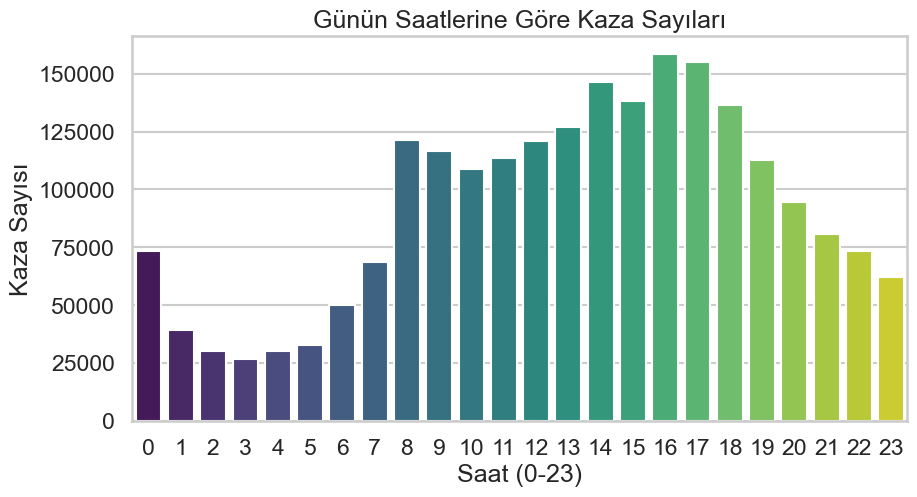

In [ ]:


plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Hour', palette='viridis')
plt.title('Günün Saatlerine Göre Kaza Sayıları')
plt.xlabel('Saat (0-23)')
plt.ylabel('Kaza Sayısı')
plt.show()



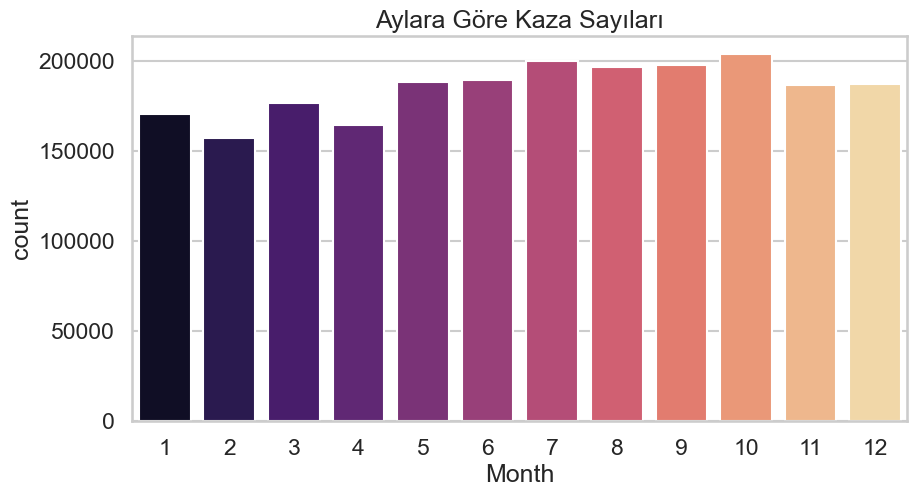

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Month', palette='magma')
plt.title('Aylara Göre Kaza Sayıları')
plt.show()

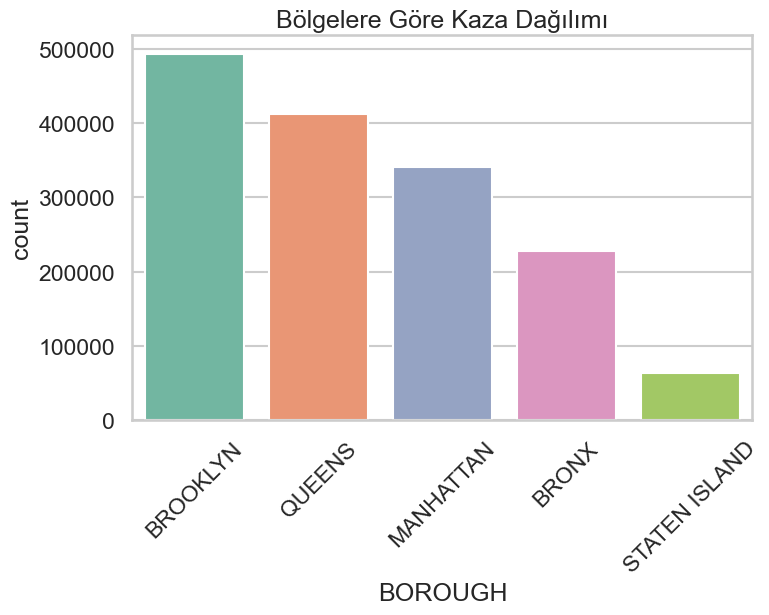

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='BOROUGH', order=df['BOROUGH'].value_counts().index, palette='Set2')
plt.title('Bölgelere Göre Kaza Dağılımı')
plt.xticks(rotation=45)
plt.show()





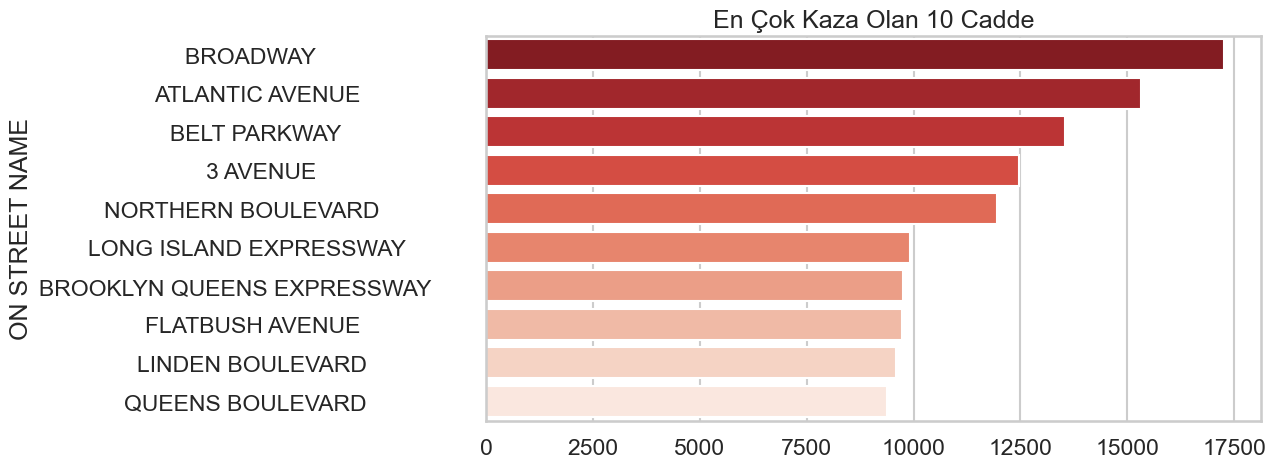

In [13]:
top_streets = df['ON STREET NAME'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_streets.values, y=top_streets.index, palette='Reds_r')
plt.title('En Çok Kaza Olan 10 Cadde')
plt.show()

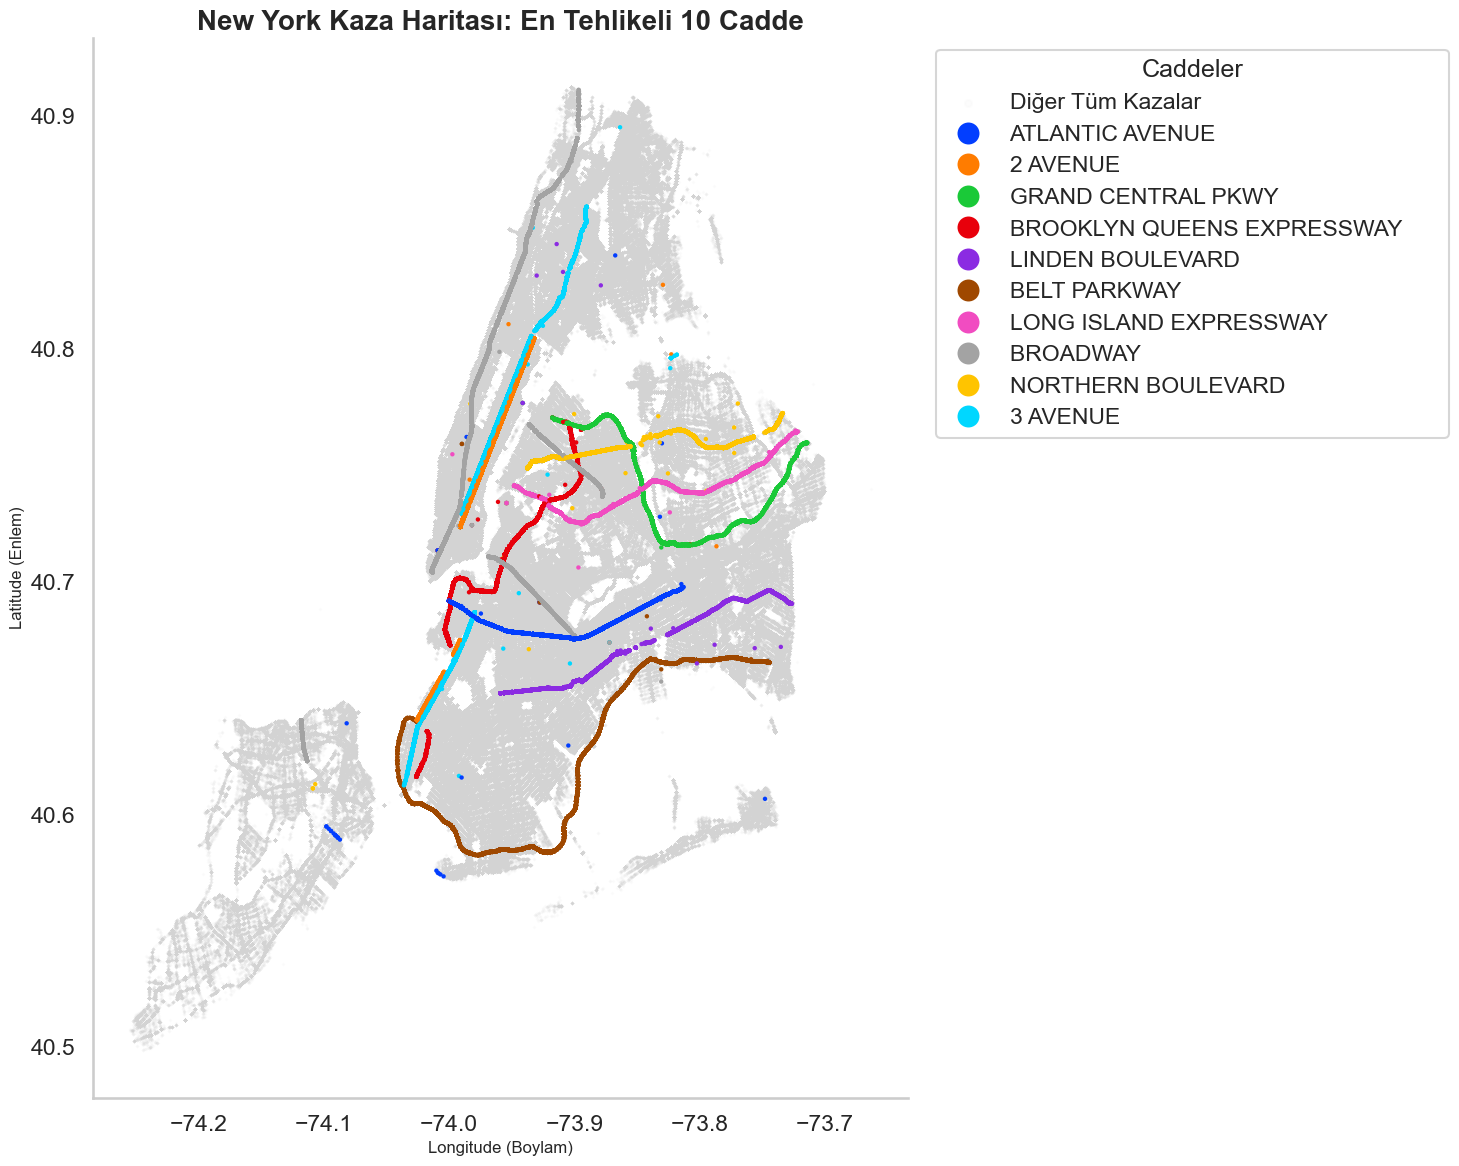

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

df_clean = df.dropna(subset=['LATITUDE', 'LONGITUDE'])
df_clean = df_clean[(df_clean['LATITUDE'] > 40.4) & (df_clean['LATITUDE'] < 41.0)]
df_clean = df_clean[(df_clean['LONGITUDE'] > -74.3) & (df_clean['LONGITUDE'] < -73.6)]

top_10_streets_names = df_clean['ON STREET NAME'].value_counts().head(10).index
df_top_streets = df_clean[df_clean['ON STREET NAME'].isin(top_10_streets_names)]

plt.figure(figsize=(15, 12))

plt.scatter(df_clean['LONGITUDE'], df_clean['LATITUDE'], 
            color='lightgrey', s=1, alpha=0.05, label='Diğer Tüm Kazalar')

sns.scatterplot(data=df_top_streets, x='LONGITUDE', y='LATITUDE', 
                hue='ON STREET NAME', palette='bright', s=10, alpha=1, linewidth=0)

plt.title('New York Kaza Haritası: En Tehlikeli 10 Cadde', fontsize=20, fontweight='bold')
plt.xlabel('Longitude (Boylam)', fontsize=12)
plt.ylabel('Latitude (Enlem)', fontsize=12)

plt.legend(title='Caddeler', bbox_to_anchor=(1.02, 1), loc='upper left', markerscale=5)

plt.grid(False)
sns.despine()

plt.tight_layout()
plt.show()